# Лабораторная работа №4: Выделение контуров на изображениях

*Вариант 1*

Выполнил:

студент группы 6132-010402D

Баканов Дмитрий

__Исходные данные__:


| № варианта |                    Задание 2 | Задание 3         | Задание 4                                         |
|------------|------------------------------|-------------------|---------------------------------------------------|
| 1          | модуль градиента как он есть | Оператор Робертса | Аппроксимация поверхностью 2-го порядка, окно 3x3 |

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings

from IPython.display import clear_output
from tqdm import tqdm


%matplotlib inline

warnings.filterwarnings("ignore")

IMAGE_PATH = "./images/Lenna.png"


def plot_image(input_image: np.ndarray) -> None:
    """Функция отрисовки изображения."""
    image_shape = input_image.shape
    plt.axis("off")
    if len(image_shape) == 3:
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(input_image, cmap='gray')
    plt.show()


def get_grayscale_image(rgb_image: np.ndarray) -> np.ndarray:
    """Функция преобразования цветного изображения в оттенки серого."""
    grayscale_image = np.dot(rgb_image[..., :3], np.array([0.2126, 0.7152, 0.0722]))
    return grayscale_image.astype(np.uint8)


def get_augmented_image(input_image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Функция для формирования дополненного изображения."""
    image_rows, image_cols = input_image.shape
    kernel_rows, kernel_cols = kernel.shape

    if kernel_rows % 2 == 0:
        augmented_shape_rows = image_rows + (kernel_rows // 2)
        copy_image_rows = (0, image_rows)
    else:
        augmented_shape_rows = image_rows + 2 * (kernel_rows // 2)
        copy_image_rows = (kernel_rows // 2, augmented_shape_rows - (kernel_rows // 2))

    if kernel_cols % 2 == 0:
        augmented_shape_cols = image_cols + (kernel_cols // 2)
        copy_image_cols = (0, image_cols)
    else:
        augmented_shape_cols = image_cols + 2 * (kernel_cols // 2)
        copy_image_cols = (kernel_cols // 2, augmented_shape_cols - (kernel_cols // 2))

    augmented_image = np.zeros((augmented_shape_rows, augmented_shape_cols))
    print(augmented_image.shape)
    augmented_image[copy_image_rows[0] : copy_image_rows[1], copy_image_rows[0] : copy_image_cols[1]] = input_image
    return augmented_image


def convolution(input_image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Функция реализации свертки."""
    __kernel = np.flipud(np.fliplr(kernel))
    rows, cols = input_image.shape
    result = np.zeros((rows, cols))
    kernel_x, kernel_y = kernel.shape

    augmented_image = get_augmented_image(input_image, kernel)

    for i in tqdm(range(rows)):
        for j in range(cols):
            result[i, j] = int((__kernel * augmented_image[i : i + kernel_x, j : j + kernel_y]).sum())
    clear_output()
    return result


def to_binary_image(input_image: np.ndarray, threshold: int = 40) -> np.ndarray:
    """Преобразование изображения в бинарное."""
    return np.vectorize(lambda x: 1 if x > threshold else 0)(input_image).astype(np.uint8)

*Задание 1. Считать цветное rgb изображение. Преобразовать в градации серого.*


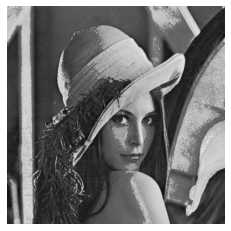

(512, 512)


In [2]:
image = cv2.imread(IMAGE_PATH).astype(np.int8)
gray_image = get_grayscale_image(image)
plot_image(gray_image)
print(gray_image.shape)

*Задание 2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод.*

* *Вход: изображение из пункта 1*
* *Вывод: бинарное изображение с контурами*

In [3]:
GRAD_X = np.array([[-1], [1]])
GRAD_Y = np.array([[-1, 1]])

grad_x = convolution(gray_image, GRAD_X)
grad_y = convolution(gray_image, GRAD_Y)

In [4]:
grad_image = np.sqrt(grad_x * grad_x + grad_y * grad_y).astype(np.int8)

Исходное изображение


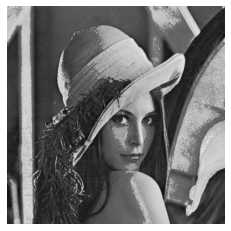

In [5]:
print("Исходное изображение")
plot_image(gray_image)

Контуры изображения после метода простого градиента


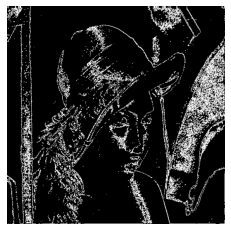

In [6]:
print("Контуры изображения после метода простого градиента")
plot_image(to_binary_image(grad_image))

*Задание 3. Сделать выделение контуров методом по вариантам.*

* *Вход: изображение из пункта 1*
* *Вывод: бинарное изображение с контурами*

In [7]:
ROBERTS_X = np.array([
    [-1, 0],
    [0,  1],
])
ROBERTS_Y = np.array([
    [0, -1],
    [1,  0],
])

roberts_grad_image_x = np.abs(convolution(gray_image, ROBERTS_X))
roberts_grad_image_y = np.abs(convolution(gray_image, ROBERTS_Y))
roberts_grad_image = roberts_grad_image_x + roberts_grad_image_y

Исходное изображение


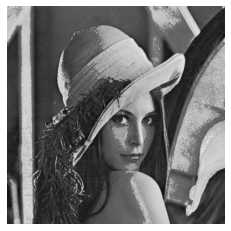

In [8]:
print("Исходное изображение")
plot_image(gray_image)

Контуры изображения после применения операторов Робертса


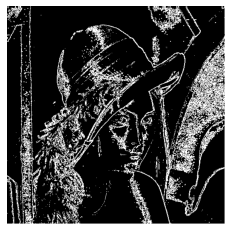

In [9]:
print("Контуры изображения после применения операторов Робертса")
plot_image(to_binary_image(roberts_grad_image))

*Задание 4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам.*

* *Вход: изображение из пункта 1*
* *Вывод: бинарное изображение с контурами*

Исходное изображение


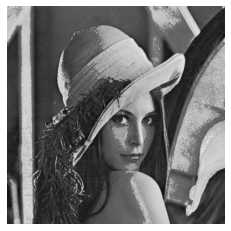

In [11]:
print("Исходное изображение")
plot_image(gray_image)

Изображение, полученное методом согласования


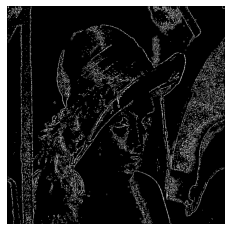

In [13]:
MASK = 1 / 3 * np.array([
    [2,  -1,  2],
    [-1, -4, -1],
    [2,  -1,  2],
])
agreement_image = convolution(gray_image, MASK)
print("Изображение, полученное методом согласования")
plot_image(to_binary_image(agreement_image))